In [ ]:
!pip uninstall tensorflow keras
!pip install tensorflow keras


Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.14.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.14.0
Found existing installation: keras 2.14.0
Uninstalling keras-2.14.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-2.14.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? y
  Successfully uninstalled keras-2.14.0
  Using cached tensorflow-2.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (489.8 MB)
  Using cached keras-2.14.0-py3-none-any.whl (1.7 MB)


In [ ]:
from keras import Sequential
from tensorflow.keras.models import Sequential
import tensorflow as tf
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D, DepthwiseConv2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
from tensorflow.keras import backend as K
from tensorflow.keras.layers import concatenate
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import cv2
from keras import backend as K
import os
import glob
import h5py
import shutil as cf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import tensorflow as tf
import keras
print(tf.__version__)
%matplotlib inline

2.13.0


In [ ]:
#install depenencies
!pip install -q kaggle

In [ ]:
#upload the credentials of the kaggle account
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jety2021329206","key":"7da1c41ea1dd27e698e2a83cd7eefb73"}'}

In [ ]:
#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#import the dataset we want to use for our project
!kaggle competitions download -c aptos2019-blindness-detection

100% 9.50G/9.51G [01:54<00:00, 55.8MB/s]
100% 9.51G/9.51G [01:54<00:00, 89.5MB/s]


In [ ]:
#lets see the imported files from kaggle competetion
!ls

aptos2019-blindness-detection.zip  kaggle.json	sample_data


In [ ]:
!unzip aptos2019-blindness-detection

Streaming output truncated to the last 5000 lines.
  inflating: test_images/512beaada8f0.png  
  inflating: test_images/51323e9d2070.png  
  inflating: test_images/515675001b9e.png  
  inflating: test_images/515877da2def.png  
  inflating: test_images/5168ddccea88.png  
  inflating: test_images/5172c056a687.png  
  inflating: test_images/5177461f5339.png  
  inflating: test_images/51910bcb980d.png  
  inflating: test_images/51a3e9b6a1c0.png  
  inflating: test_images/51bbd82feec8.png  
  inflating: test_images/51de5fb8eccd.png  
  inflating: test_images/51e88694c81f.png  
  inflating: test_images/51f0bf8f1544.png  
  inflating: test_images/51f57fb32840.png  
  inflating: test_images/51fa42dc1415.png  
  inflating: test_images/5276ab33b7b0.png  
  inflating: test_images/52a353760f72.png  
  inflating: test_images/531937254e73.png  
  inflating: test_images/5325b1c22c61.png  
  inflating: test_images/53959e0a750b.png  
  inflating: test_images/53be22c72713.png  
  inflating: test_images/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df_train = pd.read_csv('/content/train.csv')
df_train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [ ]:
df_test = pd.read_csv('/content/test.csv')
df_test.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64



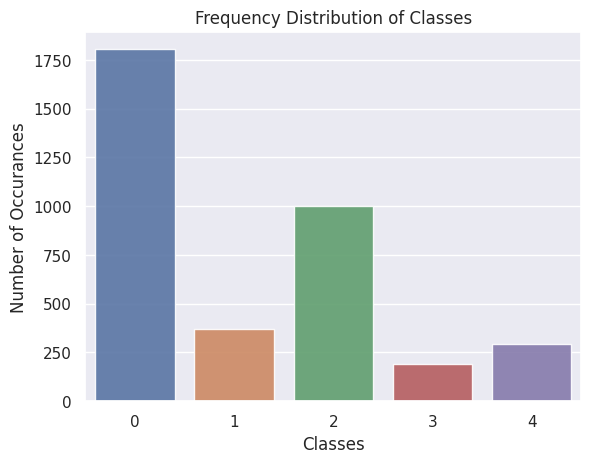

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
Class_Frequency_Count = df_train['diagnosis'].value_counts()
print(str(Class_Frequency_Count) + "\n")
sns.set(style="darkgrid")

sns.barplot(x=Class_Frequency_Count.index,y=Class_Frequency_Count.values,alpha=0.9)
plt.title("Frequency Distribution of Classes")
plt.ylabel("Number of Occurances", fontsize=12)
#plt.xticks(rotation=90)
plt.xlabel("Classes", fontsize=12)
plt.show()

In [ ]:
!rm -rf Training_Dir
!rm -rf Validation_Dir

0    1805
2     999
1     740
4     735
3     673
Name: diagnosis, dtype: int64



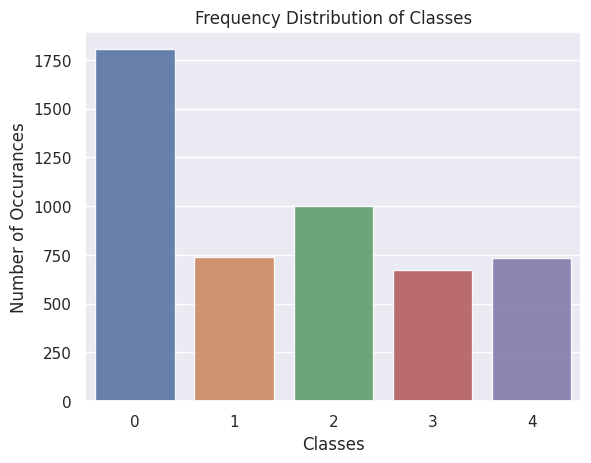

In [ ]:
tempDiag = df_train['diagnosis'].tolist()
tempImag = df_train['id_code'].tolist()
imgTmp1 = []
imgTmp3 = []
imgTmp4 = []
count1=0
for i in range(len(tempDiag)):
  if tempDiag[i] == 1:
    count1 = count1+1
    imgTmp1.append(tempImag[i])
  elif tempDiag[i] == 3:
    imgTmp3.append(tempImag[i])
  elif tempDiag[i] == 4:
    imgTmp4.append(tempImag[i])

from PIL import Image
from PIL import ImageFilter


class_labels = []
added_images = []
imgTmp=[]
kl = [1,3,4]
for l in kl:
  if l == 1:
    imgTmp = imgTmp1[: int(len(imgTmp1) * .2)]
  elif l == 3:
    imgTmp = imgTmp3[: int(len(imgTmp3) * .50)]
  elif l == 4:
    imgTmp = imgTmp4[: int(len(imgTmp4) * .3)]
  for imagefile in imgTmp:


    ext = '.png'
    imagefile_ext = imagefile  + ext
    path = 'train_images/'
    imfile = path+imagefile_ext
    im=Image.open(imfile)
    im=im.convert("RGB")
    r,g,b=im.split()
    r=r.convert("RGB")
    g=g.convert("RGB")
    b=b.convert("RGB")
    im_blur=im.filter(ImageFilter.GaussianBlur)
    im_unsharp=im.filter(ImageFilter.UnsharpMask)


    im_r = 'r_'+imagefile
    im_g = 'g_'+imagefile
    im_b = 'b_'+imagefile
    im_bl = 'bl_'+imagefile
    im_un = 'un_'+imagefile
    r.save(path+im_r+ext)
    g.save(path+im_g+ext)
    b.save(path+im_b+ext)
    im_blur.save(path+im_bl+ext)
    im_unsharp.save(path+im_un+ext)
    class_labels.append(l)
    added_images.append(im_r)
    class_labels.append(l)
    added_images.append(im_g)
    class_labels.append(l)
    added_images.append(im_b)
    class_labels.append(l)
    added_images.append(im_bl)
    class_labels.append(l)
    added_images.append(im_un)

tempDiag = tempDiag + class_labels
tempImag = tempImag + added_images
df_train = pd.DataFrame(list(zip(tempImag,tempDiag)),
               columns =['id_code', 'diagnosis'])

df_train = df_train.sample(frac=1).reset_index(drop=True)

Class_Frequency_Count = df_train['diagnosis'].value_counts()
print(str(Class_Frequency_Count) + "\n")
sns.set(style="darkgrid")
sns.barplot(x=Class_Frequency_Count.index,y=Class_Frequency_Count.values,alpha=0.9)
plt.title("Frequency Distribution of Classes")
plt.ylabel("Number of Occurances", fontsize=12)
#plt.xticks(rotation=90)
plt.xlabel("Classes", fontsize=12)
plt.show()

In [ ]:
#df_train = df_train.sample(frac=1).reset_index(drop=True)

In [13]:
split = int(0.7 * len(df_train))

train_dataframe = df_train.iloc[:split]
val_dataframe = df_train.iloc[split:]

train_images = train_dataframe['id_code'].tolist()
train_labels = train_dataframe['diagnosis'].tolist()
val_images = val_dataframe['id_code'].tolist()
val_labels = val_dataframe['diagnosis'].tolist()

0    1266
2     676
4     521
1     519
3     484
Name: diagnosis, dtype: int64



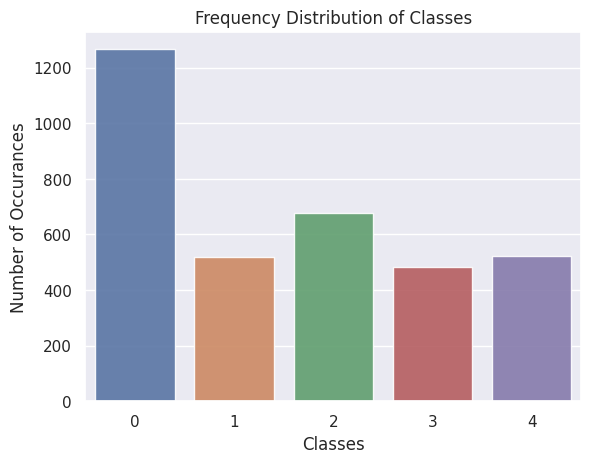

0    539
2    323
1    221
4    214
3    189
Name: diagnosis, dtype: int64



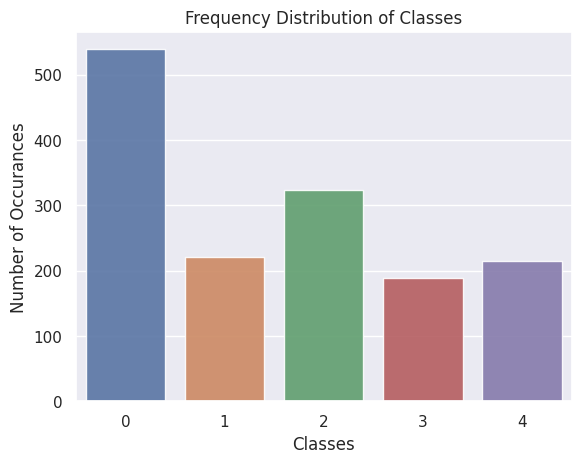

In [14]:
Train_Class_Frequency_Count = train_dataframe['diagnosis'].value_counts()
print(str(Train_Class_Frequency_Count) + "\n")
sns.set(style="darkgrid")
sns.barplot(x=Train_Class_Frequency_Count.index,y=Train_Class_Frequency_Count.values,alpha=0.9)
plt.title("Frequency Distribution of Classes")
plt.ylabel("Number of Occurances", fontsize=12)
#plt.xticks(rotation=90)
plt.xlabel("Classes", fontsize=12)
plt.show()


Val_Class_Frequency_Count = val_dataframe['diagnosis'].value_counts()
print(str(Val_Class_Frequency_Count) + "\n")
sns.set(style="darkgrid")
sns.barplot(x=Val_Class_Frequency_Count.index,y=Val_Class_Frequency_Count.values,alpha=0.9)
plt.title("Frequency Distribution of Classes")
plt.ylabel("Number of Occurances", fontsize=12)
#plt.xticks(rotation=90)
plt.xlabel("Classes", fontsize=12)
plt.show()

In [15]:
train_keyword = 'Training_Dir'
validation_keyword = 'Validation_Dir'
keywords = [train_keyword,validation_keyword]
dir_list = df_train['diagnosis'].tolist()

for keyword in keywords:
  if(not os.path.exists(keyword)):
    os.mkdir(keyword)
  for class_dir in dir_list:
    if(not os.path.exists(keyword+'/'+str(class_dir))):
      os.mkdir(keyword+'/'+str(class_dir))

In [16]:
for keyword in keywords:
  image_list = []
  class_list = []
  if(not os.path.exists(keyword)):
    os.mkdir(keyword)
  if keyword == train_keyword:
    image_list = train_images
    class_list = train_labels
  elif keyword == validation_keyword:
    image_list = val_images
    class_list = val_labels
  for image_info in image_list:
    cl = class_list[image_list.index(image_info)]
    cf.copy('train_images/'+str(image_info)+'.png', keyword+'/'+str(cl))

In [17]:
train_dir = 'Training_Dir'
validation_dir = 'Validation_Dir'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=15,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')


validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 50

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 3466 images belonging to 5 classes.
Found 1486 images belonging to 5 classes.


In [18]:

def build_model():
    input_img = Input(shape=(224,224,3), name='ImageInput')
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1')(input_img)
    x = MaxPooling2D((2,2), name='pool1')(x)

    x = SeparableConv2D(128, (3,3), activation='relu', padding='same', name='Conv2')(x)
    x = BatchNormalization(name='bn2')(x)
    x = MaxPooling2D((2,2), name='pool2')(x)

    x = SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3')(x)
    x = BatchNormalization(name='bn3')(x)
    x = MaxPooling2D((2,2), name='pool3')(x)

    x = Flatten(name='flatten')(x)
    x = Dense(125, activation='relu', name='fc2')(x)
    x = Dropout(0.5, name='dropout2')(x)
    x = Dense(5, activation='softmax', name='fc3')(x)

    model = Model(inputs=input_img, outputs=x)
    return model

In [19]:
model =  build_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ImageInput (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 Conv1 (Conv2D)              (None, 224, 224, 64)      1792      
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 Conv2 (SeparableConv2D)     (None, 112, 112, 128)     8896      
                                                                 
 bn2 (BatchNormalization)    (None, 112, 112, 128)     512       
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0         
                                                                 
 Conv3 (SeparableConv2D)     (None, 56, 56, 256)       34176 

In [20]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)

In [21]:
!rm -rf Test_Images
!rm -rf Train_Images

In [22]:
epochs = 15
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples//train_generator.batch_size ,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples//validation_generator.batch_size,
      verbose=1)

Epoch 1/15
34/34 [==============================] - 1147s 34s/step - loss: 1.4494 - accuracy: 0.4138 - val_loss: 1.5565 - val_accuracy: 0.3717
Epoch 2/15
34/34 [==============================] - 1130s 33s/step - loss: 1.2905 - accuracy: 0.4658 - val_loss: 1.5279 - val_accuracy: 0.3717
Epoch 3/15
34/34 [==============================] - 1126s 33s/step - loss: 1.2663 - accuracy: 0.4908 - val_loss: 1.5471 - val_accuracy: 0.3717
Epoch 4/15
34/34 [==============================] - 1141s 34s/step - loss: 1.2598 - accuracy: 0.4915 - val_loss: 1.5453 - val_accuracy: 0.3717
Epoch 5/15
34/34 [==============================] - 1155s 34s/step - loss: 1.2285 - accuracy: 0.5033 - val_loss: 1.5391 - val_accuracy: 0.3717
Epoch 6/15
34/34 [==============================] - 1152s 34s/step - loss: 1.2152 - accuracy: 0.4917 - val_loss: 1.5380 - val_accuracy: 0.3717
Epoch 7/15
34/34 [==============================] - 1139s 33s/step - loss: 1.1507 - accuracy: 0.5244 - val_loss: 1.5313 - val_accuracy: 0.3717

In [23]:
# Save Weights of the Model for Future Use
model.save_weights('Model_DepthSeparable.h5')

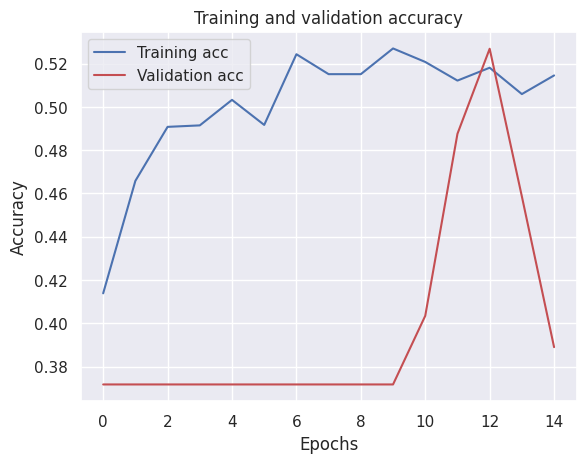

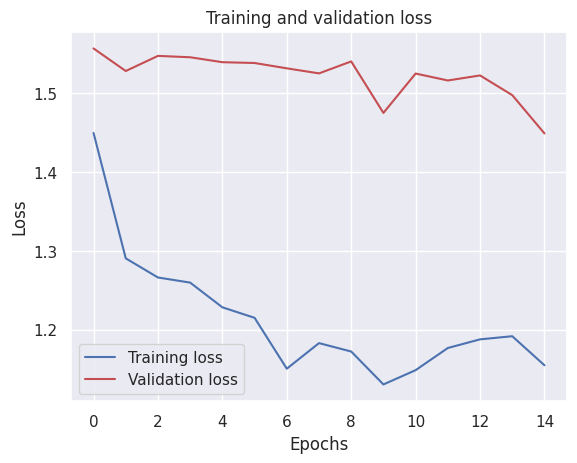

In [24]:
# Plot

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
# Max Accuracy

print("Validation Accuracy:", max(history.history['val_accuracy']))
print("Training Accuracy", max(history.history['accuracy']))

Validation Accuracy: 0.5268965363502502
Training Accuracy 0.5270350575447083
